##AGENDA
##1. TRABAJANDO CON DATAFRAMES
##2. OBTENIERNDO MEDIDAS CENTRALES
##3. ANALIZANDO GRÁFICAS

##1. TRABAJANDO CON DATAFRAMES (MARCO DE DATOS)

In [ ]:
##INSTALANDO LIBRERIAS
!pip install statsmodels

In [ ]:
!pip install wquantiles

In [ ]:
import pandas as pd #manipulacion y analisis de datos
import numpy as np #calculos matematicos
from scipy.stats import trim_mean #estadistica
from statsmodels import robust
import wquantiles
import seaborn as sns #graficas bonitas
import matplotlib.pyplot as plt


In [ ]:
estado=pd.read_csv("/content/state.csv")

In [ ]:
estado.head(3)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ


In [ ]:
estado.tail() #MUESTRA LOS 5 ULTIMOS VALORES

,State,Population,Murder.Rate,Abbreviation
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


,State,Population,Murder.Rate,Abbreviation
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [ ]:
estado.sample(5) #elige 5 registros al azar y los imprime

,State,Population,Murder.Rate,Abbreviation
34,Ohio,11536504,4.0,OH
31,New York,19378102,3.1,NY
33,North Dakota,672591,3.0,ND
47,West Virginia,1852994,4.0,WV
7,Delaware,897934,5.8,DE


In [ ]:
estado.columns #para verificar el nombre de las columbas (features)

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [ ]:
list(estado.colums) #otra forma de ver los nombres de las columnas

In [ ]:
estado.info() #hay que hacerse para saber si hay nulos y si toca limpiar o que cosa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [ ]:
estado.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [ ]:
#ANALIZAR MEDIDAS DE TENDENCIA CENTRAL Y ESTIMAR TASAS DE POBLACIÓN Y ASESINATOS

In [ ]:
#para agarrar el nombre de las features usamos la de columns

In [ ]:
estado["Population"].mean()

6162876.3

In [ ]:
trim_mean(estado.Population,0.1) #el 0,1 es cuanto corta de las esquinas en porcentajes

4783697.125

In [ ]:
estado["Murder.Rate"].mean()

4.066

In [ ]:
trim_mean(estado["Murder.Rate"], 0.1) #el 0,1 es cuanto corta de las esquinas en porcentajes

3.9450000000000003

In [ ]:
#MEDIA PONDERADA
np.average(estado["Population"], weights=estado["Population"])

13620491.638786951

In [ ]:
#MEDIA PONDERADA
np.average(estado["Murder.Rate"], weights=estado["Population"])

4.445833981123393

In [ ]:
estado.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


<Axes: >

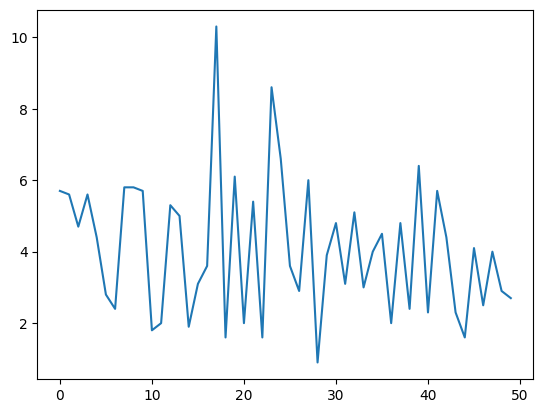

In [ ]:
estado["Murder.Rate"].plot.line()

<Axes: >

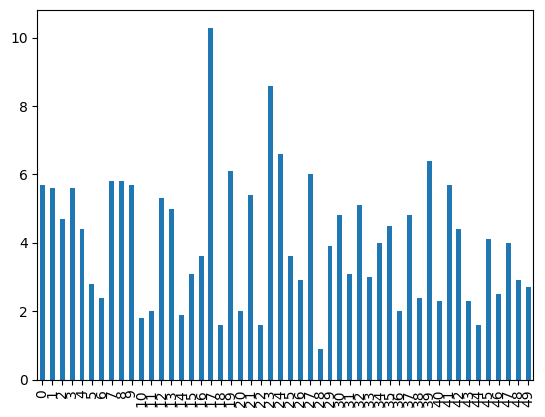

In [ ]:
estado["Murder.Rate"].plot.bar()

<Axes: >

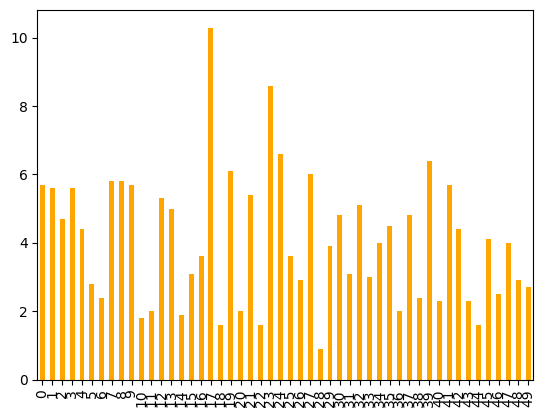

In [ ]:
estado["Murder.Rate"].plot.bar(color="orange")

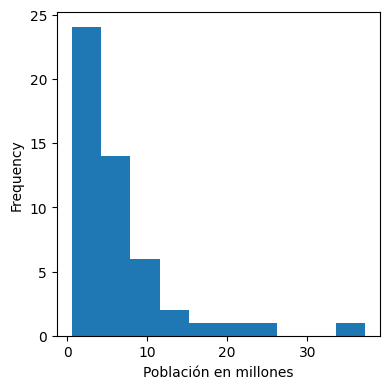

In [ ]:
ax = (estado["Population"]/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Población en millones")

plt.tight_layout()
plt.show()

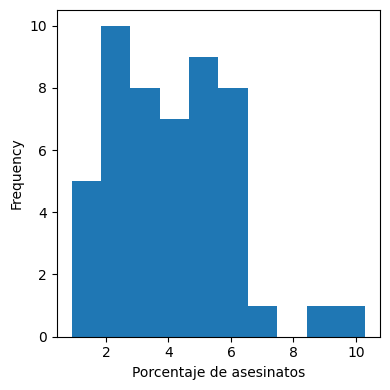

In [ ]:
ax = (estado["Murder.Rate"]).plot.hist(figsize=(4,4))
ax.set_xlabel("Porcentaje de asesinatos")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figur

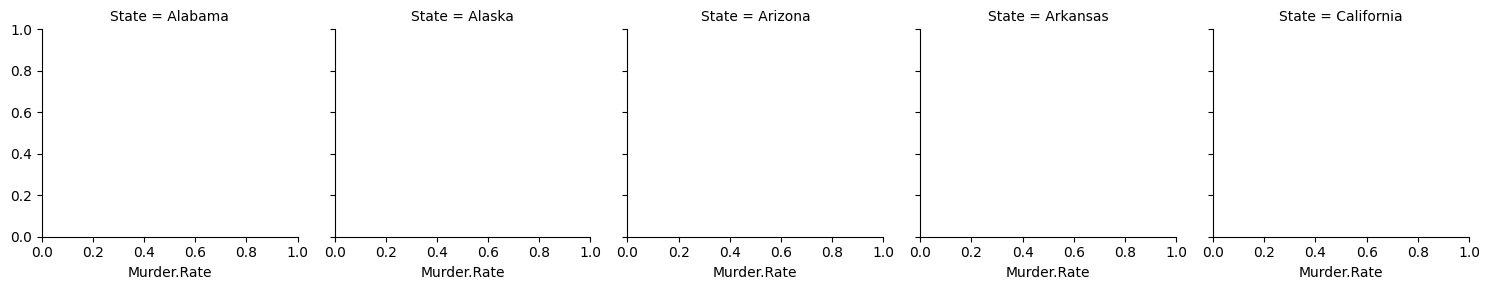

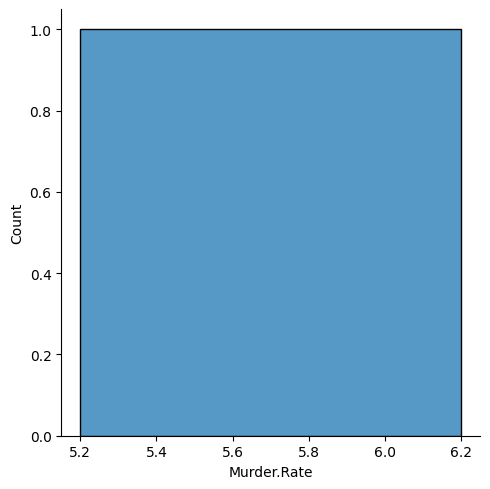

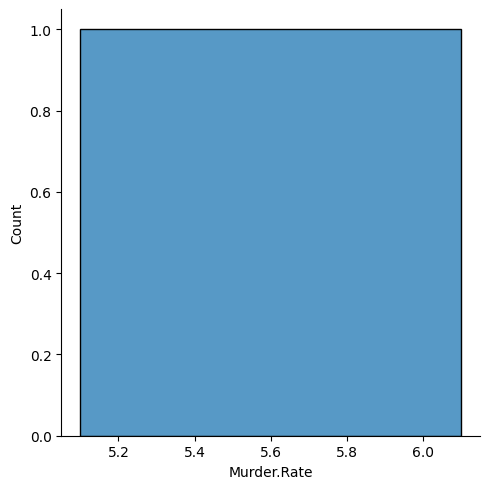

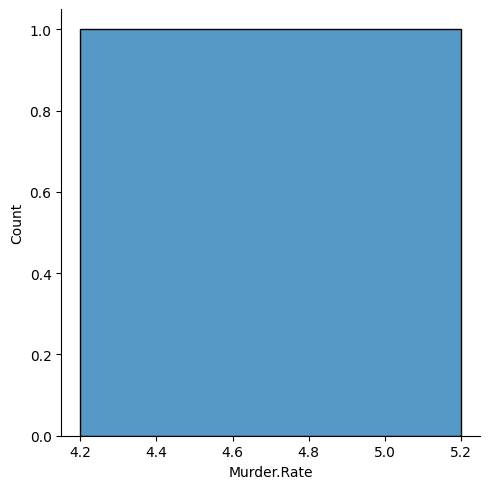

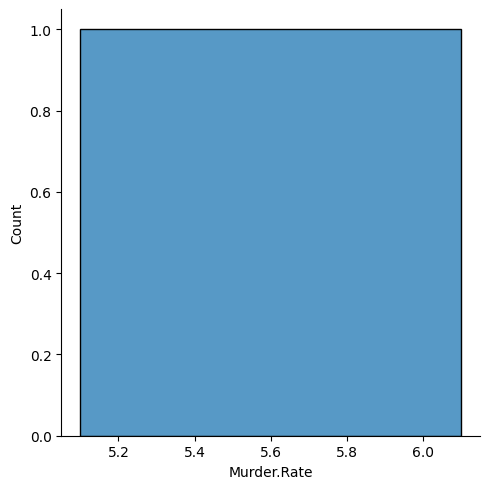

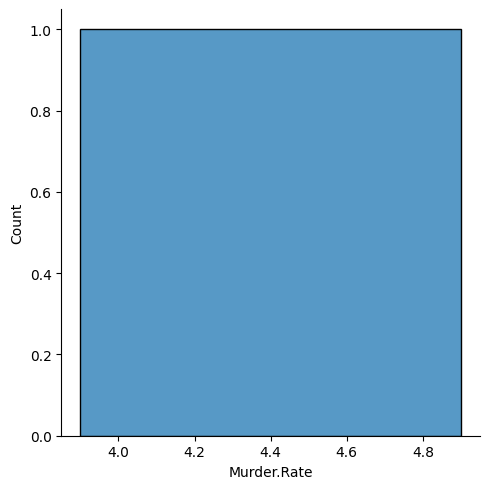

In [ ]:
analisis=estado.head()
g=sns.FacetGrid(analisis,col="State")
g.map(sns.displot,"Murder.Rate")